# Data Transform for iDiv database

In [ ]:
# for the rerun : update season function with something better

In [1]:
import numpy as np 
import pandas as pd
from os import listdir
from os.path import isfile, join, isdir
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import pickle
import re
import math
from datetime import datetime, timedelta
from tests import *
from tools import *
import numpy_indexed as npi
from matplotlib.pyplot import figure

In [10]:
# final out
data = pd.read_csv("30_min_final/complete_soil_temp_30_min_no_filling.csv")
data["datetime"] = pd.to_datetime(data["datetime"])
codes = list(set(data["plotcode"]))

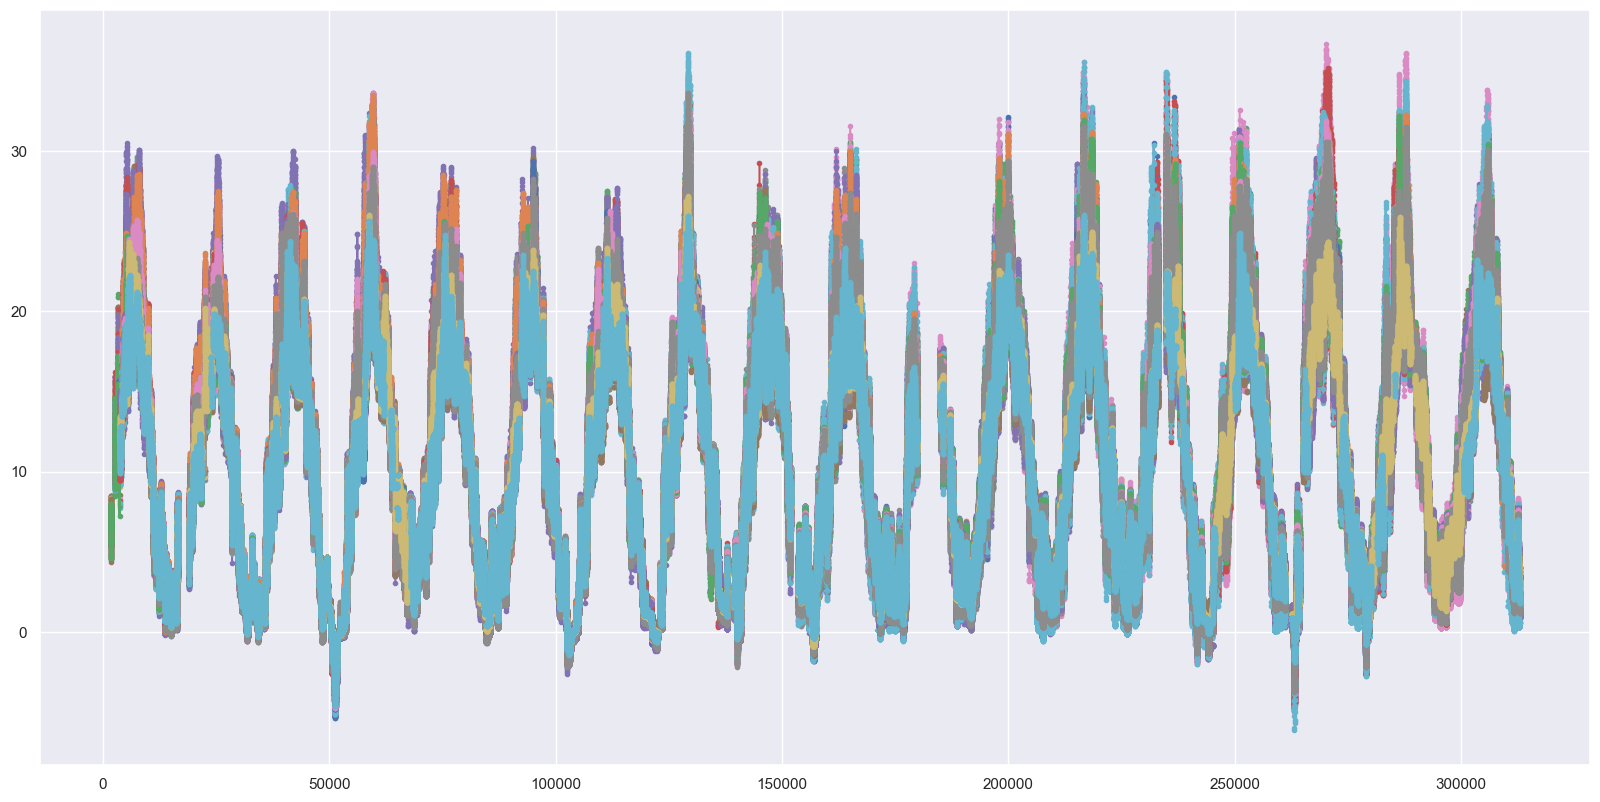

In [11]:
var = data.columns[2:][1]
a = pd.Timestamp(str(2002) + "-12-31 23:59")
b = pd.Timestamp(str(2021) + "-01-01 00:00")
condition = (data["datetime"] > a) & (data["datetime"]< b)
selection= data[condition]
figure(figsize=(20, 10),dpi=100)
for plotcode in codes:
    x = list(range(0, len(selection[selection["plotcode"] == plotcode][var])))
    plt.plot(selection[selection["plotcode"] == plotcode][var].values, marker= ".")

In [6]:
data = pd.read_csv("30_min_final/block_2_soil_temp_30_min_no_filling.csv")
data["datetime"] = pd.to_datetime(data["datetime"])
codes = list(set(data["plotcode"]))

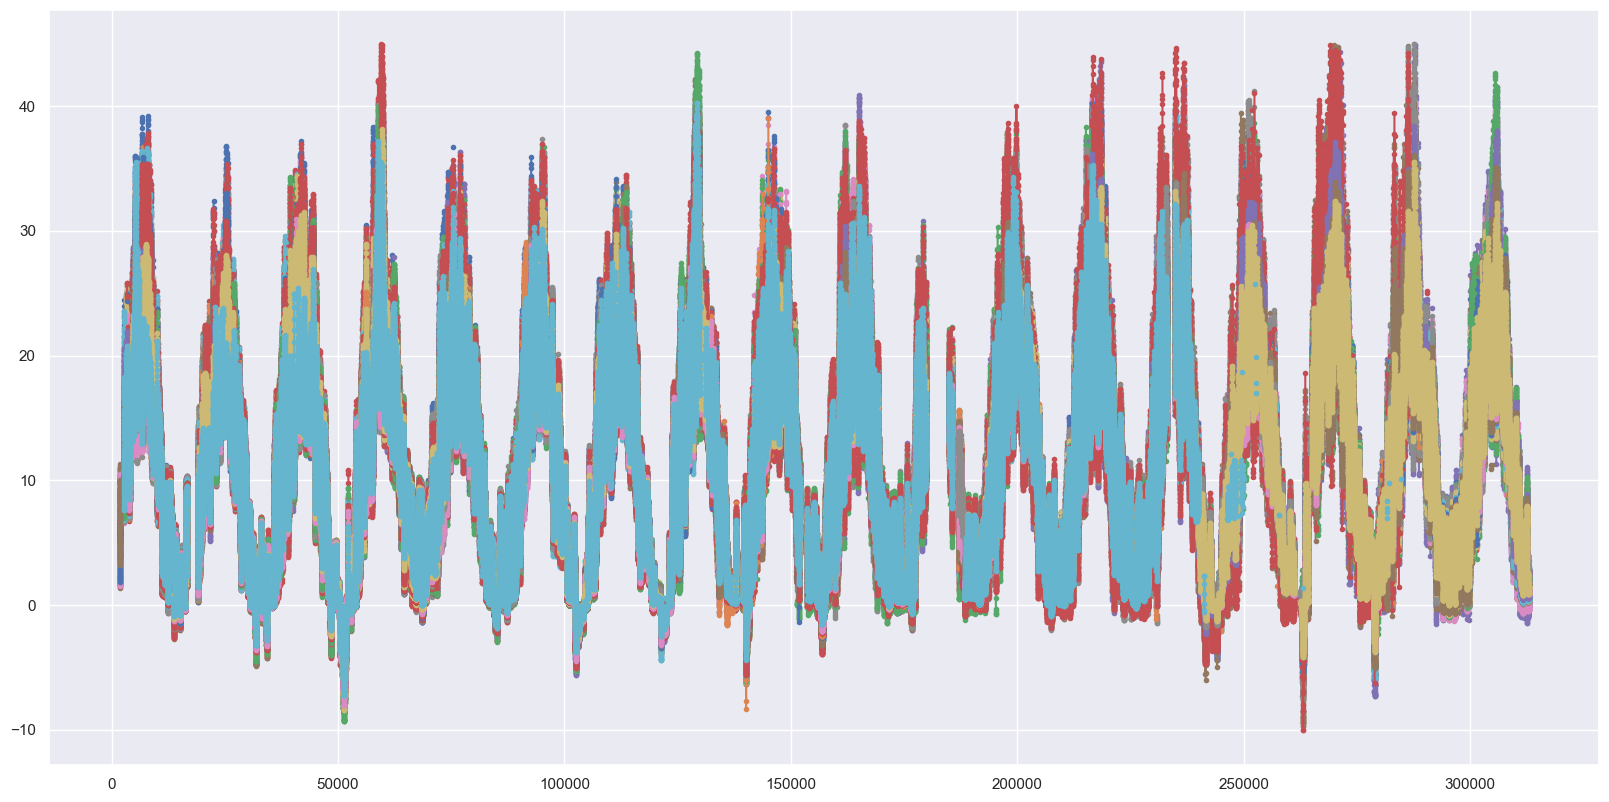

In [7]:
var = data.columns[2:][0]
a = pd.Timestamp(str(2002) + "-12-31 23:59")
b = pd.Timestamp(str(2021) + "-01-01 00:00")
condition = (data["datetime"] > a) & (data["datetime"]< b)
selection= data[condition]
figure(figsize=(20, 10),dpi=100)
for plotcode in codes:
    x = list(range(0, len(selection[selection["plotcode"] == plotcode][var])))
    plt.plot(selection[selection["plotcode"] == plotcode][var].values, marker= ".")

## For the Ts this performs: 
    - load prepared_filtered
    - fill gaps with season means
    - sum to half hourly
    - dump the table

In [2]:
#table should hold: 
#date,depth,final file, original value, replacement, reason

In [3]:
relevant = []
for x in allColumns: 
    if 'spare_temp_OR_volt' in x: 
        pass
    elif 'underpress_suction_plates' in x: 
        pass
    elif 'underpress_suc_plates' in x: 
        pass
    elif "air_rel_humidiy_30cm" in x: 
        pass
    elif x == "t[s]":
        pass
    else:
        relevant.append(x) 

In [4]:
#redo the % variables with a different filter
redo = []
for x in allColumns: 
    if "air_rel_humidiy_30cm" in x:
        redo.append(x)

# Combine 

In [5]:
time = pickle.load(open("data_transform/prepared_filtered/" + "time" + ".p", "rb"))
timeScaled = np.reshape(np.concatenate((np.array([np.datetime64('2003-02-26 09:00:00')]*27),time.values)),(156561*2,30)).T[0]
pickle.dump(timeScaled, open("data_transform/prepared_30min_ts/" + "timeline30" + ".p", "wb"))

## Table1

In [13]:
column1 = []
for x in relevant: 
    if 'soil_temp_05cm_depth_' in x: 
        column1.append(x)

In [14]:
column2 = []
for x in relevant: 
    if 'soil_temp_15cm_depth_' in x: 
        column2.append(x)

In [15]:
container = []
container2 = []
time = pickle.load(open("data_transform/prepared_filtered/" + "time" + ".p", "rb"))
time30 = pickle.load(open("data_transform/prepared_30min_ts/" + "timeline30" + ".p", "rb"))

In [16]:
for x in column1: 
    data = pd.DataFrame(time)
    data[x] = pickle.load(open("data_transform/prepared_filtered/" + x + ".p", "rb"))
    data = time_sum(data, "halfHourly")
    c = pd.DataFrame(time30)
    c["soil_temp_05cm"] = data
    c["plotcode"] = x[21:26]
    container.append(c)

In [17]:
for x in column2: 
    data = pd.DataFrame(time)
    data[x] = pickle.load(open("data_transform/prepared_filtered/" + x + ".p", "rb"))
    data = time_sum(data, "halfHourly")
    c = pd.DataFrame(time30)
    c["soil_temp_15cm"] = data
    c["plotcode"] = x[21:26]
    container2.append(c)

In [18]:
row1 = pd.concat(container2).reset_index(drop=True)
row2 = pd.concat(container).reset_index(drop=True)

In [19]:
final1 = row1.merge(row2,on=["plotcode",0],how="outer")

In [20]:
order = [0, "plotcode", "soil_temp_05cm", "soil_temp_15cm"]
final1 = final1[order]

In [21]:
final1.rename(columns= {0:"datetime"},inplace=True)

In [22]:
#done
final1.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_1.csv")

## Table2

In [6]:
relevant = []
for x in allColumns: 
    if 'spare_temp_OR_volt' in x: 
        pass
    elif 'underpress_suction_plates' in x: 
        pass
    elif 'underpress_suc_plates' in x: 
        pass
    elif x == "t[s]":
        pass
    else:
        relevant.append(x) 

In [7]:
columns2 = []
for x in relevant: 
    if '_2A' in x: 
        columns2.append(x)

In [8]:
container2 = {}
container2['soil_temp_05cm_depth'] = []
container2['soil_temp_15cm_depth'] = []
container2['soil_temp_60cm_depth'] = []
container2['air_temp_30cm'] = []
container2["air_rel_humidiy_30cm"] = []
container2["surface_temp_south_west"] = []
time = pickle.load(open("data_transform/prepared_filtered/" + "time" + ".p", "rb"))
time30 = pickle.load(open("data_transform/prepared_30min_ts/" + "timeline30" + ".p", "rb"))

In [9]:
for x in columns2: 
    data = pd.DataFrame(time)
    data[x] = pickle.load(open("data_transform/prepared_filtered/" + x + ".p", "rb"))
    data = time_sum(data, "halfHourly")
    c = pd.DataFrame(time30)
    if 'soil_temp_05cm_depth' in x:
        c["soil_temp_05cm"] = data
        c["plotcode"] = x[21:26]        
        container2["soil_temp_05cm_depth"].append(c)
    elif 'soil_temp_15cm_depth' in x:
        c["soil_temp_15cm"] = data
        c["plotcode"] = x[21:26]
        container2["soil_temp_15cm_depth"].append(c)
    elif 'soil_temp_60cm_depth' in x:
        c['soil_temp_60cm'] = data
        c["plotcode"] = x[21:26]
        container2["soil_temp_60cm_depth"].append(c)
    elif "air_temp_30cm" in x:
        c["air_temp_30cm"] = data
        c["plotcode"] = x[18:23]
        container2['air_temp_30cm'].append(c)
    elif "air_rel_humidiy_30cm" in x:
        c["air_rel_humidiy_30cm"] = data
        c["plotcode"] = x[25:30]
        container2["air_rel_humidiy_30cm"].append(c)
    elif "surface_temp_south_west" in x:
        c["surface_temp_south_west"] = data
        c["plotcode"] = x[24:29]
        container2["surface_temp_south_west"].append(c)
    else:
        pass

/home/stein/nextcloud/PHD/tools.py:569: RuntimeWarning: Mean of empty slice
  scaled = np.nanmean(np.reshape(np.concatenate((np.array([np.nan]*27),ts[ts.columns[1]].values)),(156561*2,30)),axis=1)


In [10]:
row1 = pd.concat(container2['soil_temp_05cm_depth']).reset_index(drop=True)
row2 = pd.concat(container2['soil_temp_15cm_depth']).reset_index(drop=True)
row3 = pd.concat(container2['soil_temp_60cm_depth']).reset_index(drop=True)
row4 = pd.concat(container2['air_temp_30cm']).reset_index(drop=True)
row5 = pd.concat(container2["air_rel_humidiy_30cm"]).reset_index(drop=True)
row6 = pd.concat(container2["surface_temp_south_west"]).reset_index(drop=True)

In [11]:
final2 = row1.merge(row2,on=["plotcode",0],how="outer")

In [12]:
final2 = final2.merge(row3,on=["plotcode",0],how="outer")
final2 = final2.merge(row4,on=["plotcode",0],how="outer")
final2 = final2.merge(row5,on=["plotcode",0],how="outer")
final2 = final2.merge(row6,on=["plotcode",0],how="outer")

In [13]:
order = [0, "plotcode", "soil_temp_05cm", "soil_temp_15cm", 'soil_temp_60cm','air_temp_30cm',"air_rel_humidiy_30cm","surface_temp_south_west"]
final2 = final2[order]

In [14]:
final2.rename(columns= {0:"datetime"},inplace=True)

In [15]:
for x in final2.columns[2:]:
    print((sum(np.isnan(final2[x]))))

1307452
1258500
1276025
1548518
1665099
1520314


In [16]:
#done
final2.to_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_1.csv")

# Filter extreme seasonal values based on all Ts

1. calculate the mean and Quartiles for every season
2. Construct boxplot threshold
3. Threshhold filter them out
4. replace them with mean values over the plots at this point in time

In [17]:
data = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_1.csv")

## Table1

In [18]:
acceptRange = 1.5
Q1_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.25)
Q3_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.75)
mean_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').mean()
mean_5.rename(columns= {'soil_temp_05cm': "mean_5"},inplace=True)

In [19]:
IQR_5 = Q3_5 - Q1_5
outlier_step_5 = acceptRange * IQR_5    
mini_5 = Q1_5 - outlier_step_5
mini_5.rename(columns= {'soil_temp_05cm': "mini_5"},inplace=True)
maxi_5 = Q3_5 + outlier_step_5
maxi_5.rename(columns= {'soil_temp_05cm': "maxi_5"},inplace=True)

In [20]:
Q1_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.25)
Q3_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.75)
mean_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').mean()
mean_15.rename(columns= {'soil_temp_15cm': "mean_15"},inplace=True)

In [21]:
IQR_15 = Q3_15 - Q1_15
outlier_step_15 = acceptRange * IQR_15    
mini_15 = Q1_15 - outlier_step_15
mini_15.rename(columns= {'soil_temp_15cm': "mini_15"},inplace=True)
maxi_15 = Q3_15 + outlier_step_15
maxi_15.rename(columns= {'soil_temp_15cm': "maxi_15"},inplace=True)

In [22]:
borders5 = mini_5.merge(maxi_5,how="outer",left_index=True, right_index= True)
borders5 = borders5.merge(mean_5,how="outer",left_index=True, right_index= True)

borders15 = mini_15.merge(maxi_15,how="outer",left_index=True, right_index= True)
borders15 = borders15.merge(mean_15,how="outer",left_index=True, right_index= True)

In [23]:
borders = borders5.merge(borders15,how="outer",left_index=True, right_index= True)

In [24]:
join = data.merge(borders, how="outer", left_on="datetime", right_index= True)
join= join.sort_index()

In [25]:
# Save the filter
setToNan = {}
setToNan["soil_temp_05cm"] = join.loc[join["soil_temp_05cm"]== join["mean_5"],["soil_temp_05cm"]]
setToNan["soil_temp_15cm"] = join.loc[join["soil_temp_15cm"]== join["mean_15"],["soil_temp_15cm"]]

In [26]:
# Save to NaN here
join.loc[join["soil_temp_05cm"] == join["mean_5"],["soil_temp_05cm"]] = np.nan
join.loc[join["soil_temp_15cm"] == join["mean_15"],["soil_temp_15cm"]] = np.nan

In [27]:
selection1 = (join["soil_temp_05cm"] > join["maxi_5"]) | (join["soil_temp_05cm"] < join["mini_5"])
selection2 = (join["soil_temp_15cm"] > join["maxi_15"]) | (join["soil_temp_15cm"] < join["mini_15"])

In [28]:
boxplot_filter = {}
boxplot_filter["soil_temp_05cm"] = join[selection1][["mean_5","soil_temp_05cm"]]
boxplot_filter["soil_temp_15cm"] = join[selection2][["mean_15","soil_temp_15cm"]]
pickle.dump(boxplot_filter, open("data_transform/prepared_30min_ts/" + "boxplot_filtered" + ".p", "wb"))

In [29]:
join.loc[selection2,"soil_temp_15cm"] = join.loc[selection2,"mean_15"]
join.loc[selection1,"soil_temp_05cm"] = join.loc[selection1,"mean_5"]

In [30]:
join.drop(columns=["Unnamed: 0", "mini_5", "maxi_5", "mini_15", "maxi_15", "mean_5", "mean_15"],inplace= True)

In [31]:
# Extra: Add some special values that are not correctly filtered
add1 = join.loc[join['soil_temp_05cm'] < -20,"soil_temp_05cm" ]
add2 = join.loc[(join['datetime'] < "2003-04-02 23:59") & (~pd.isnull(join['soil_temp_05cm'])),'soil_temp_05cm' ] 
add3 = join.loc[join['soil_temp_15cm'] < -20,"soil_temp_15cm" ]
add4 = join.loc[(join['datetime'] <"2003-04-02 23:59") & (~pd.isnull(join['soil_temp_15cm'])),'soil_temp_15cm' ] 
join.loc[add1.index, "soil_temp_05cm"] = np.nan
join.loc[add2.index, "soil_temp_05cm"] = np.nan
join.loc[add3.index, "soil_temp_15cm"] = np.nan
join.loc[add4.index, "soil_temp_15cm"] = np.nan

In [32]:
a = pd.concat([pd.DataFrame(add1),(pd.DataFrame(add2))])
a = a[~a.index.duplicated(keep='first')]
b = pd.concat([pd.DataFrame(add3),(pd.DataFrame(add4))])
b = b[~b.index.duplicated(keep='first')]
setToNan["soil_temp_05cm"] = pd.concat([setToNan["soil_temp_05cm"],a]).sort_index()
setToNan["soil_temp_15cm"] = pd.concat([setToNan["soil_temp_15cm"],b]).sort_index()

In [33]:
pickle.dump(setToNan, open("data_transform/prepared_30min_ts/" + "single_filtered" + ".p", "wb"))

In [34]:
#done
join.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_2.csv", index=False)

# Then: Fill NaNs with season means

In [116]:
join = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_2.csv")
join["datetime"] = pd.to_datetime(join["datetime"])

In [117]:
join["fillings"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings"] = fullTimeLine.Mean.values

In [118]:
join["fillings2"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_15cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings2"] = fullTimeLine.Mean.values

In [119]:
filled = {}
filled["soil_temp_05cm"] = join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"].index.values
filled["soil_temp_15cm"] = join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"].index.values
pickle.dump(filled, open("data_transform/prepared_30min_ts/" + "filled_with_season_mean" + ".p", "wb"))

In [120]:
#fill everything
join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"] =  join.loc[np.isnan(join["soil_temp_05cm"]), "fillings"].values
join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"] =  join.loc[np.isnan(join["soil_temp_15cm"]), "fillings2"].values

In [121]:
#There should be no nans
sum(np.isnan(join["soil_temp_05cm"])), sum(np.isnan(join["soil_temp_15cm"]))

(0, 0)

In [122]:
join.drop(columns=["fillings","fillings2"],inplace= True)

In [123]:
#done
join.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv", index=False)

## Table 2

In [130]:
data = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_1.csv")

In [131]:
data = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_1.csv")
data["datetime"] = pd.to_datetime(data["datetime"])
acceptRange = 1.5

In [132]:
acceptRange = 1.5
Q1_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.25)
Q3_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.75)
mean_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').mean()
mean_5.rename(columns= {'soil_temp_05cm': "mean_5"},inplace=True)
IQR_5 = Q3_5 - Q1_5
outlier_step_5 = acceptRange * IQR_5    
mini_5 = Q1_5 - outlier_step_5
mini_5.rename(columns= {'soil_temp_05cm': "mini_5"},inplace=True)
maxi_5 = Q3_5 + outlier_step_5
maxi_5.rename(columns= {'soil_temp_05cm': "maxi_5"},inplace=True)

In [133]:
Q1_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.25)
Q3_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.75)
mean_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').mean()
mean_15.rename(columns= {'soil_temp_15cm': "mean_15"},inplace=True)
IQR_15 = Q3_15 - Q1_15
outlier_step_15 = acceptRange * IQR_15    
mini_15 = Q1_15 - outlier_step_15
mini_15.rename(columns= {'soil_temp_15cm': "mini_15"},inplace=True)
maxi_15 = Q3_15 + outlier_step_15
maxi_15.rename(columns= {'soil_temp_15cm': "maxi_15"},inplace=True)

In [134]:
Q1_60 = data[["datetime",'soil_temp_60cm']].groupby('datetime').quantile(0.25)
Q3_60 = data[["datetime",'soil_temp_60cm']].groupby('datetime').quantile(0.75)
mean_60 = data[["datetime",'soil_temp_60cm']].groupby('datetime').mean()
mean_60.rename(columns= {'soil_temp_60cm': "mean_60"},inplace=True)
IQR_60 = Q3_60 - Q1_60
outlier_step_60 = acceptRange * IQR_60    
mini_60 = Q1_60 - outlier_step_60
mini_60.rename(columns= {'soil_temp_60cm': "mini_60"},inplace=True)
maxi_60 = Q3_60 + outlier_step_60
maxi_60.rename(columns= {'soil_temp_60cm': "maxi_60"},inplace=True)

In [135]:
Q1_30 = data[["datetime",'air_temp_30cm']].groupby('datetime').quantile(0.25)
Q3_30 = data[["datetime",'air_temp_30cm']].groupby('datetime').quantile(0.75)
mean_30 = data[["datetime",'air_temp_30cm']].groupby('datetime').mean()
mean_30.rename(columns= {'air_temp_30cm': "mean_30"},inplace=True)
IQR_30 = Q3_30 - Q1_30
outlier_step_30 = acceptRange * IQR_30    
mini_30 = Q1_30 - outlier_step_30
mini_30.rename(columns= {'air_temp_30cm': "mini_30"},inplace=True)
maxi_30 = Q3_30 + outlier_step_30
maxi_30.rename(columns= {'air_temp_30cm': "maxi_30"},inplace=True)

In [136]:
Q1_rel = data[["datetime",'air_rel_humidiy_30cm']].groupby('datetime').quantile(0.25)
Q3_rel = data[["datetime",'air_rel_humidiy_30cm']].groupby('datetime').quantile(0.75)
mean_rel = data[["datetime",'air_rel_humidiy_30cm']].groupby('datetime').mean()
mean_rel.rename(columns= {'air_rel_humidiy_30cm': "mean_rel"},inplace=True)
IQR_rel = Q3_rel - Q1_rel
outlier_step_rel = acceptRange * IQR_rel    
mini_rel = Q1_rel - outlier_step_rel
mini_rel.rename(columns= {'air_rel_humidiy_30cm': "mini_rel"},inplace=True)
maxi_rel= Q3_rel + outlier_step_rel
maxi_rel.rename(columns= {'air_rel_humidiy_30cm': "maxi_rel"},inplace=True)

In [137]:
Q1_sur = data[["datetime",'surface_temp_south_west']].groupby('datetime').quantile(0.25)
Q3_sur = data[["datetime",'surface_temp_south_west']].groupby('datetime').quantile(0.75)
mean_sur = data[["datetime",'surface_temp_south_west']].groupby('datetime').mean()
mean_sur.rename(columns= {'surface_temp_south_west': "mean_sur"},inplace=True)
IQR_sur = Q3_sur - Q1_sur
outlier_step_sur = acceptRange * IQR_sur   
mini_sur= Q1_sur - outlier_step_sur
mini_sur.rename(columns= {'surface_temp_south_west': "mini_sur"},inplace=True)
maxi_sur= Q3_sur + outlier_step_sur
maxi_sur.rename(columns= {'surface_temp_south_west': "maxi_sur"},inplace=True)

In [138]:
borders5 = mini_5.merge(maxi_5,how="outer",left_index=True, right_index= True)
borders5 = borders5.merge(mean_5,how="outer",left_index=True, right_index= True)
borders15 = mini_15.merge(maxi_15,how="outer",left_index=True, right_index= True)
borders15 = borders15.merge(mean_15,how="outer",left_index=True, right_index= True)
borders60 = mini_60.merge(maxi_60,how="outer",left_index=True, right_index= True)
borders60 = borders60.merge(mean_60,how="outer",left_index=True, right_index= True)
borders30 = mini_30.merge(maxi_30,how="outer",left_index=True, right_index= True)
borders30 = borders30.merge(mean_30,how="outer",left_index=True, right_index= True)
bordersrel = mini_rel.merge(maxi_rel,how="outer",left_index=True, right_index= True)
bordersrel = bordersrel.merge(mean_rel,how="outer",left_index=True, right_index= True)
borderssur = mini_sur.merge(maxi_sur,how="outer",left_index=True, right_index= True)
borderssur = borderssur.merge(mean_sur,how="outer",left_index=True, right_index= True)

In [139]:
borders = borders5.merge(borders15,how="outer",left_index=True, right_index= True)
borders = borders.merge(borders60,how="outer",left_index=True, right_index= True)
borders = borders.merge(borders30,how="outer",left_index=True, right_index= True)
borders = borders.merge(bordersrel,how="outer",left_index=True, right_index= True)
borders = borders.merge(borderssur,how="outer",left_index=True, right_index= True)

In [140]:
join = data.merge(borders, how="outer", left_on="datetime", right_index= True)

In [141]:
join= join.sort_index()

In [142]:
#This is to filter that are solo while everything else is missing. They are most likely errors and will not get catched by the Boxplot

In [143]:
# Save the filter
setToNan = {}
setToNan["soil_temp_05cm"] = join.loc[join["soil_temp_05cm"]== join["mean_5"],["soil_temp_05cm"]]
setToNan["soil_temp_15cm"] = join.loc[join["soil_temp_15cm"]== join["mean_15"],["soil_temp_15cm"]]
setToNan["soil_temp_60cm"] = join.loc[join["soil_temp_60cm"]== join["mean_60"],["soil_temp_60cm"]]
setToNan['air_temp_30cm'] = join.loc[join['air_temp_30cm']== join["mean_30"],['air_temp_30cm']]
setToNan['air_rel_humidiy_30cm'] = join.loc[join['air_rel_humidiy_30cm']== join["mean_rel"],['air_rel_humidiy_30cm']]         
setToNan['surface_temp_south_west'] = join.loc[join['surface_temp_south_west']== join["mean_sur"],['surface_temp_south_west']]   

In [144]:
# Save to NaN here
join.loc[join["soil_temp_05cm"] == join["mean_5"],["soil_temp_05cm"]] = np.nan
join.loc[join["soil_temp_15cm"] == join["mean_15"],["soil_temp_15cm"]] = np.nan
join.loc[join["soil_temp_60cm"] == join["mean_60"],["soil_temp_60cm"]] = np.nan
join.loc[join['air_temp_30cm'] == join["mean_30"],['air_temp_30cm']] = np.nan
join.loc[join['air_rel_humidiy_30cm'] == join["mean_rel"],['air_rel_humidiy_30cm']] = np.nan
join.loc[join['surface_temp_south_west'] == join["mean_sur"],['surface_temp_south_west']] = np.nan

In [145]:
selection1 = (join["soil_temp_05cm"] > join["maxi_5"]) | (join["soil_temp_05cm"] < join["mini_5"])
selection2 = (join["soil_temp_15cm"] > join["maxi_15"]) | (join["soil_temp_15cm"] < join["mini_15"])
selection3 = (join["soil_temp_60cm"] > join["maxi_60"]) | (join["soil_temp_60cm"] < join["mini_60"])
selection4 = (join['air_temp_30cm'] > join["maxi_30"]) | (join['air_temp_30cm'] < join["mini_30"])
selection5 = (join['air_rel_humidiy_30cm'] > join["maxi_rel"]) | (join['air_rel_humidiy_30cm'] < join["mini_rel"])
selection6 = (join['surface_temp_south_west'] > join["maxi_sur"]) | (join['surface_temp_south_west'] < join["mini_sur"])

In [146]:
boxplot_filter = {}
boxplot_filter["soil_temp_05cm"] = join[selection1][["mean_5","soil_temp_05cm"]]
boxplot_filter["soil_temp_15cm"] = join[selection2][["mean_15","soil_temp_15cm"]]
boxplot_filter["soil_temp_60cm"] = join[selection3][["mean_60","soil_temp_60cm"]]
boxplot_filter['air_temp_30cm'] = join[selection4][["mean_30",'air_temp_30cm']]
boxplot_filter['air_rel_humidiy_30cm'] = join[selection5][["mean_rel",'air_rel_humidiy_30cm']]
boxplot_filter['surface_temp_south_west'] = join[selection6][["mean_sur",'surface_temp_south_west']]
pickle.dump(boxplot_filter, open("data_transform/prepared_30min_ts/" + "boxplot_filtered_2" + ".p", "wb"))

In [147]:
join.loc[selection1,"soil_temp_05cm"] = join.loc[selection1,"mean_5"]
join.loc[selection2,"soil_temp_15cm"] = join.loc[selection2,"mean_15"]
join.loc[selection3,"soil_temp_60cm"] = join.loc[selection3,"mean_60"]
join.loc[selection4,'air_temp_30cm'] = join.loc[selection4,"mean_30"]
join.loc[selection5,'air_rel_humidiy_30cm'] = join.loc[selection5,"mean_rel"]
join.loc[selection6,'surface_temp_south_west'] = join.loc[selection6,"mean_sur"]

In [148]:
join.drop(columns=["Unnamed: 0", "mini_5", "maxi_5", "mini_15", "maxi_15",
                   "mean_5", "mean_15", "mini_60", "maxi_60", "mini_30", "maxi_30",
                   "mean_60", "mean_30", "mini_rel", "maxi_rel", "mini_sur", "maxi_sur",
                   "mean_rel", "mean_sur"],inplace= True)

In [150]:
add1 = join.loc[(join['soil_temp_60cm']<= 0.1),"soil_temp_60cm" ]
join.loc[add1.index, "soil_temp_60cm"] = np.nan
add2 = join.loc[(join['datetime'] > pd.Timestamp(str(2014) + "-07-30 23:59")) &
         (join['datetime'] < (pd.Timestamp(str(2014) + "-07-31 23:59"))) &
         (join["soil_temp_15cm"] < 10),"soil_temp_15cm"]
join.loc[add2.index, "soil_temp_15cm"] = np.nan
add3 = join.loc[(join['datetime'] > pd.Timestamp(str(2014) + "-07-30 23:59")) &
         (join['datetime'] < (pd.Timestamp(str(2014) + "-07-31 23:59"))) &
         (join['surface_temp_south_west'] < 10),'surface_temp_south_west']
join.loc[add3.index, 'surface_temp_south_west'] = np.nan
add4 = join.loc[(join['datetime'] > pd.Timestamp(str(2002) + "-12-31 23:59")) &
         (join['datetime'] < (pd.Timestamp(str(2003) + "-08-01 00:00"))) &
         (join['surface_temp_south_west'] < -10),'surface_temp_south_west']
join.loc[add4.index, 'surface_temp_south_west'] = np.nan

In [151]:
setToNan["soil_temp_60cm"] = pd.concat([setToNan["soil_temp_60cm"],pd.DataFrame(add1)]).sort_index()
setToNan["soil_temp_15cm"] = pd.concat([setToNan["soil_temp_15cm"],pd.DataFrame(add2)]).sort_index()
setToNan['surface_temp_south_west'] = pd.concat([setToNan['surface_temp_south_west'],pd.DataFrame(add3)]).sort_index()
setToNan['surface_temp_south_west'] = pd.concat([setToNan['surface_temp_south_west'],pd.DataFrame(add4)]).sort_index()

In [152]:
pickle.dump(setToNan, open("data_transform/prepared_30min_ts/" + "single_filtered_2" + ".p", "wb"))

In [154]:
join.to_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_2.csv", index=False)

# Then: Fill NaNs with season means

In [155]:
join["fillings"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings"] = fullTimeLine.Mean.values

In [156]:
join["fillings2"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_15cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings2"] = fullTimeLine.Mean.values

In [157]:
join["fillings3"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_60cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings3"] = fullTimeLine.Mean.values

In [158]:
join["fillings4"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime",'air_temp_30cm' ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings4"] = fullTimeLine.Mean.values

In [159]:
join["fillings5"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime",'air_rel_humidiy_30cm' ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings5"] = fullTimeLine.Mean.values

In [160]:
join["fillings6"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime",'surface_temp_south_west' ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings6"] = fullTimeLine.Mean.values

In [161]:
filled = {}
filled["soil_temp_05cm"] = join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"].index.values
filled["soil_temp_15cm"] = join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"].index.values
filled["soil_temp_60cm"] = join.loc[np.isnan(join["soil_temp_60cm"]), "soil_temp_60cm"].index.values
filled['air_temp_30cm'] = join.loc[np.isnan(join['air_temp_30cm']), 'air_temp_30cm'].index.values
filled['air_rel_humidiy_30cm'] = join.loc[np.isnan(join['air_rel_humidiy_30cm']), 'air_rel_humidiy_30cm'].index.values
filled['surface_temp_south_west'] = join.loc[np.isnan(join['surface_temp_south_west']), 'surface_temp_south_west'].index.values

pickle.dump(filled, open("data_transform/prepared_30min_ts/" + "filled_with_season_mean_2" + ".p", "wb"))

In [162]:
#fill everything
join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"] =  join.loc[np.isnan(join["soil_temp_05cm"]), "fillings"].values
join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"] =  join.loc[np.isnan(join["soil_temp_15cm"]), "fillings2"].values
join.loc[np.isnan(join["soil_temp_60cm"]), "soil_temp_60cm"] =  join.loc[np.isnan(join["soil_temp_60cm"]), "fillings3"].values
join.loc[np.isnan(join['air_temp_30cm']), 'air_temp_30cm'] =  join.loc[np.isnan(join['air_temp_30cm']), "fillings4"].values
join.loc[np.isnan(join['air_rel_humidiy_30cm']), 'air_rel_humidiy_30cm'] =  join.loc[np.isnan(join['air_rel_humidiy_30cm']), "fillings5"].values
join.loc[np.isnan(join['surface_temp_south_west']), 'surface_temp_south_west'] =  join.loc[np.isnan(join['surface_temp_south_west']), "fillings6"].values

In [163]:
join.drop(columns=["fillings","fillings2","fillings3","fillings4","fillings5","fillings6"],inplace= True)

In [164]:
#There should be no NaNs
sum(pd.isnull(join).values)

array([0, 0, 0, 0, 0, 0, 0, 0])

In [165]:
#done
join.to_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min.csv", index=False)

# New: Filter single values that were not captured by the method

# Build the filter table

In [54]:
#table1

In [129]:
singleFilter = pickle.load(open("data_transform/prepared_30min_ts/" + "single_filtered" + ".p", "rb"))
filledWithMean = pickle.load(open("data_transform/prepared_30min_ts/" + "filled_with_season_mean" + ".p", "rb"))
boxplot = pickle.load(open("data_transform/prepared_30min_ts/" + "boxplot_filtered" + ".p", "rb"))

In [130]:
data = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv")

In [131]:
container = []
for x in filledWithMean.keys():
    container.append(build_filling_table(singleFilter,filledWithMean, boxplot, x)) 

Size tests: 
True
True
True
Size tests: 
True
True
True


In [132]:
finalTable = pd.concat(container)
finalTable = finalTable.reset_index(drop= True)

In [133]:
add= data.loc[finalTable["indices in data table"].values,["datetime"]]
add2= data.loc[finalTable["indices in data table"].values,["plotcode"]]
finalTable["datetime"] = add.values
finalTable["plotcode"] = add2.values

In [134]:
finalTable = finalTable[["indices in data table", "datetime", "plotcode","variable", "original value", "filling type", "filtered type"]]
finalTable.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_processing_info.csv", index=False)

In [76]:
#table2

In [166]:
singleFilter = pickle.load(open("data_transform/prepared_30min_ts/" + "single_filtered_2" + ".p", "rb"))
filledWithMean = pickle.load(open("data_transform/prepared_30min_ts/" + "filled_with_season_mean_2" + ".p", "rb"))
boxplot = pickle.load(open("data_transform/prepared_30min_ts/" + "boxplot_filtered_2" + ".p", "rb"))

In [167]:
data = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min.csv")

In [168]:
container = []
for x in filledWithMean.keys():
    container.append(build_filling_table(singleFilter,filledWithMean, boxplot, x)) 

Size tests: 
True
True
True
Size tests: 
True
True
True
Size tests: 
True
True
True
Size tests: 
True
True
True
Size tests: 
True
True
True
Size tests: 
True
True
True


In [169]:
finalTable = pd.concat(container)
finalTable = finalTable.reset_index(drop= True)

In [170]:
add= data.loc[finalTable["indices in data table"].values,["datetime"]]
add2= data.loc[finalTable["indices in data table"].values,["plotcode"]]
finalTable["datetime"] = add.values
finalTable["plotcode"] = add2.values

In [171]:
finalTable = finalTable[["indices in data table", "datetime", "plotcode","variable", "original value", "filling type", "filtered type"]]

In [172]:
finalTable = pd.concat(container)
finalTable.to_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_processing_info.csv", index=False)

# Rebuild a table without any fillings. Only removals

In [173]:
#This could be done earlier but if we rebuild it with our info table we can double check if everything worked
#table 2

In [174]:
boxplot = pickle.load(open("data_transform/prepared_30min_ts/" + "boxplot_filtered_2" + ".p", "rb"))

In [175]:
data = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_2.csv")

In [176]:
finalTable = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_processing_info.csv")

In [177]:
filled = finalTable.loc[(finalTable["filling type"] == "boxplot mean") & (finalTable["variable"] == finalTable["variable"][0]), "indices in data table"]

In [178]:
for x in list(set(finalTable["variable"])):
    filled = finalTable.loc[(finalTable["filling type"] == "boxplot mean") & (finalTable["variable"] == x), "indices in data table"]
    print(sum(np.isnan(data.loc[filled, x])))
    data.loc[filled, x] = np.nan
    print(sum(np.isnan(data.loc[filled, x])))

0
173945
0
316562
0
396206
0
365584
0
355126
0
233977


In [179]:
data.to_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_no_filling.csv", index=False)

In [91]:
#table 1

In [139]:
data = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_2.csv")

In [140]:
finalTable = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_processing_info.csv")

In [141]:
for x in list(set(finalTable["variable"])):
    filled = finalTable.loc[(finalTable["filling type"] == "boxplot mean") & (finalTable["variable"] == x), "indices in data table"]
    print(sum(np.isnan(data.loc[filled, x])))
    data.loc[filled, x] = np.nan
    print(sum(np.isnan(data.loc[filled, x])))

0
697400
0
640044


In [142]:
data.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_no_filling.csv", index=False)

# Display and Check (compare the different steps with each other)

In [96]:
# - Compare graphically
#  - Does filling match the original and the filled final
#  - Does the info table represent correctly. Check all info inside

In [97]:
data1 = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_no_filling.csv",float_precision='round_trip')
data2 = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min.csv")
finalTable = pd.read_csv("data_transform/prepared_30min_ts/block_2_soil_temp_30_min_processing_info.csv")

In [ ]:
data1 = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_no_filling.csv",float_precision='round_trip')
data2 = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv",float_precision='round_trip')
finalTable = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min_processing_info.csv")

In [98]:
np.sum(pd.isnull(data1)) + np.sum(data1 == data2)

datetime                   6888684
plotcode                   6888684
soil_temp_05cm             6888684
soil_temp_15cm             6888684
soil_temp_60cm             6888684
air_temp_30cm              6888684
air_rel_humidiy_30cm       6888684
surface_temp_south_west    6888684
dtype: int64

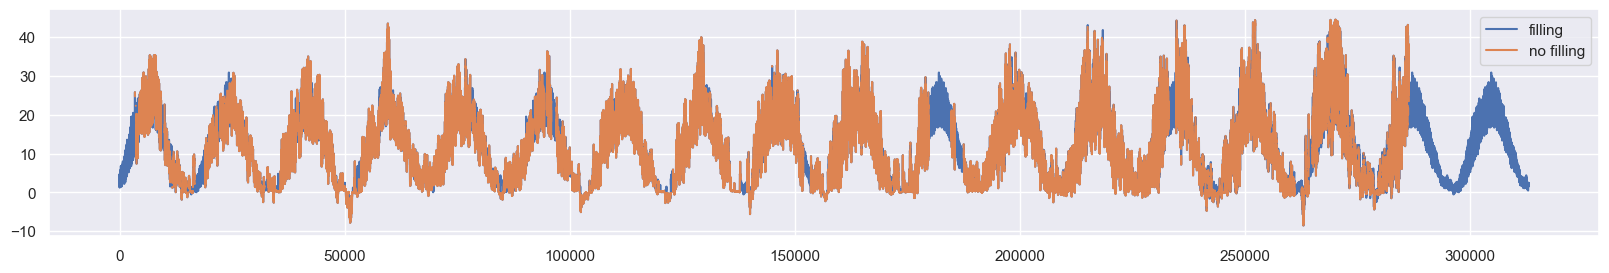

In [99]:
figure(figsize=(20, 3),dpi=100)
plt.plot(data2.loc[data2["plotcode"] == "2A04M", "soil_temp_05cm"].values,label="filling")
plt.plot(data1.loc[data1["plotcode"] == "2A04M", "soil_temp_05cm"].values,label="no filling")
plt.legend()

In [108]:
len(finalTable) + 1567

10409826

In [103]:
len(finalTable[finalTable["filtered type"] == "single TS"])

1567

In [101]:
len(finalTable[finalTable["filtered type"] == "boxplot outlier"])

1890372

In [105]:
len(finalTable[finalTable["filtered type"] != "boxplot outlier"]) + len(finalTable[finalTable["filtered type"] == "boxplot outlier"]) + len(finalTable[finalTable["filtered type"] == "single TS"])

10409826

In [113]:
sum(~np.isnan(data1.loc[finalTable[finalTable["variable"]== "soil_temp_05cm"]["indices in data table"],"soil_temp_05cm"]))

0

In [ ]:
sum(~np.isnan(data1.loc[finalTable[finalTable["variable"]== "soil_temp_05cm"]["indices in data table"],"soil_temp_05cm"]))

In [114]:
sum(~np.isnan(data1.loc[finalTable[finalTable["variable"]== "soil_temp_15cm"]["indices in data table"],"soil_temp_15cm"]))

0

In [114]:
sum(np.isnan(data2.loc[data2["plotcode"] == "2A04M", "soil_temp_05cm"].values))

110103

In [50]:
data["datetime"] = data["datetime"].astype('datetime64[D]')
data2["datetime"] = data2["datetime"].astype('datetime64[D]')
old = data2.groupby("datetime").mean()["soil_temp_05cm"]
new = data.groupby("datetime").mean()["soil_temp_05cm"]

In [52]:
ts1 = load_ts("soil_temp_05cm_depth_2A01M[°C]")

building timeseries: soil_temp_05cm_depth_2A01M[°C]
loading rounded timestamps...
loading columns information...
loading main data file...
loading additional column: soil_temp_05cm_depth_2A01M[_]...


/home/stein/envs/idiv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Data has 1613593 rows that are  empty
Additional column soil_temp_05cm_depth_2A01M[_]has 67840 non empty values
Data has 1545753 rows that are empty after merch (67840 values were added through wrong column merges).
Spreading time...
len after merging and spreading: 9426976
dropping duplicate timestamps...
len after dropping: 9393633
Loading done.


In [53]:
ts1["t[s]"] = ts1["t[s]"].astype('datetime64[D]')
step0= ts1.groupby("t[s]").mean()["soil_temp_05cm_depth_2A01M[°C]"]

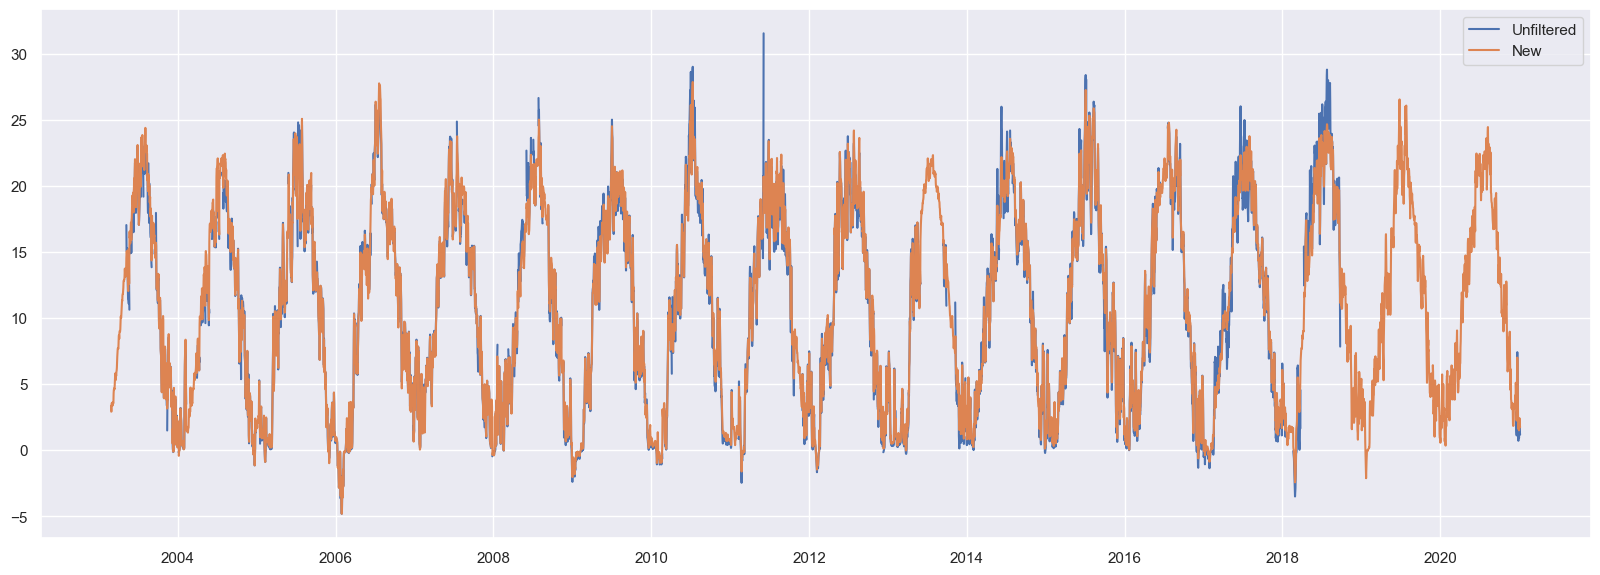

In [59]:
figure(figsize=(20, 7),dpi=100)
plt.plot(step0,label="Unfiltered")

plt.plot(new,label="New")
plt.legend()

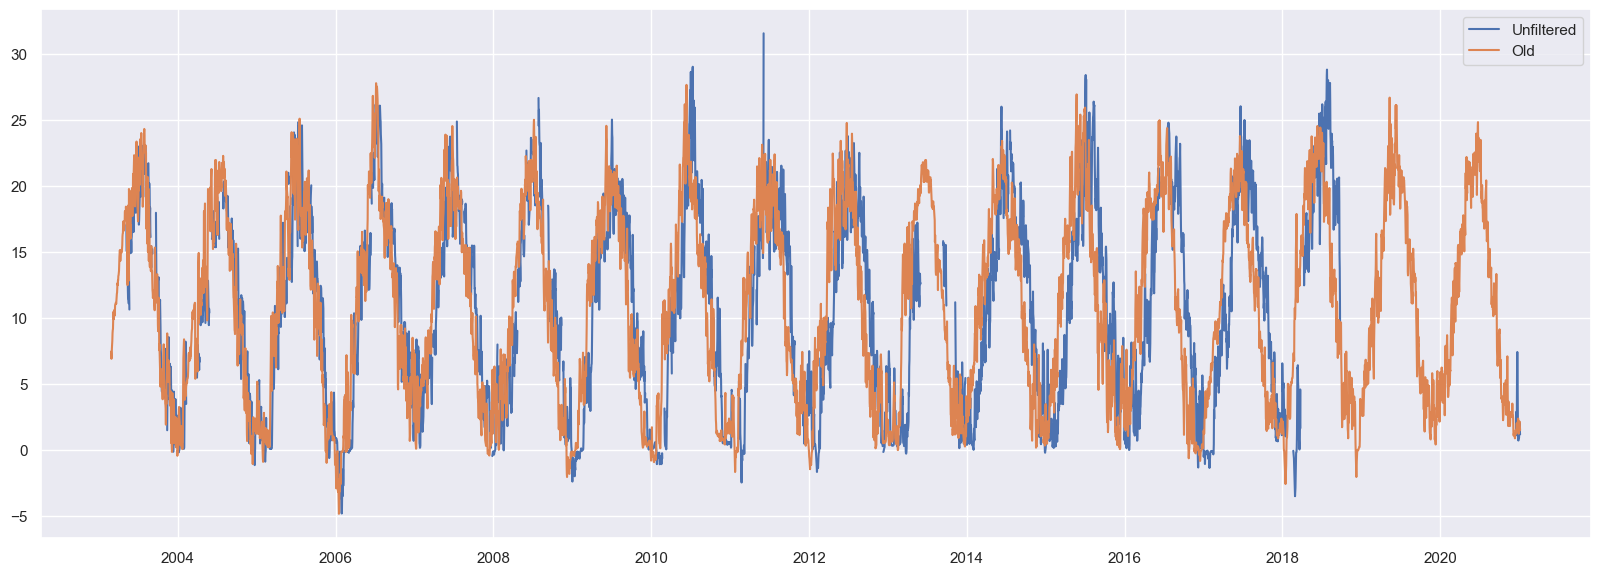

In [58]:
figure(figsize=(20, 7),dpi=100)
plt.plot(step0,label="Unfiltered")
plt.plot(old,label="Old")

plt.legend()

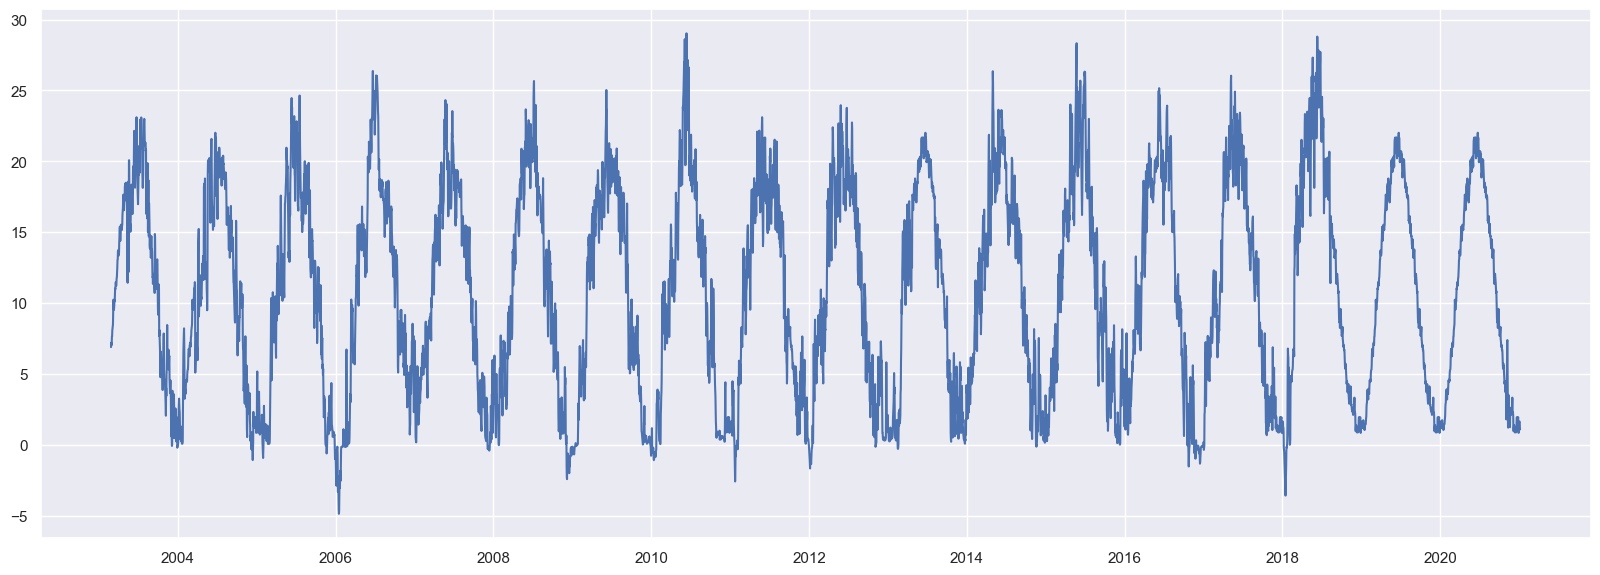

In [91]:
figure(figsize=(20, 7),dpi=100)
plt.plot(data2[data2["plotcode"] == "2A01M"].groupby("datetime").mean()["soil_temp_05cm"])

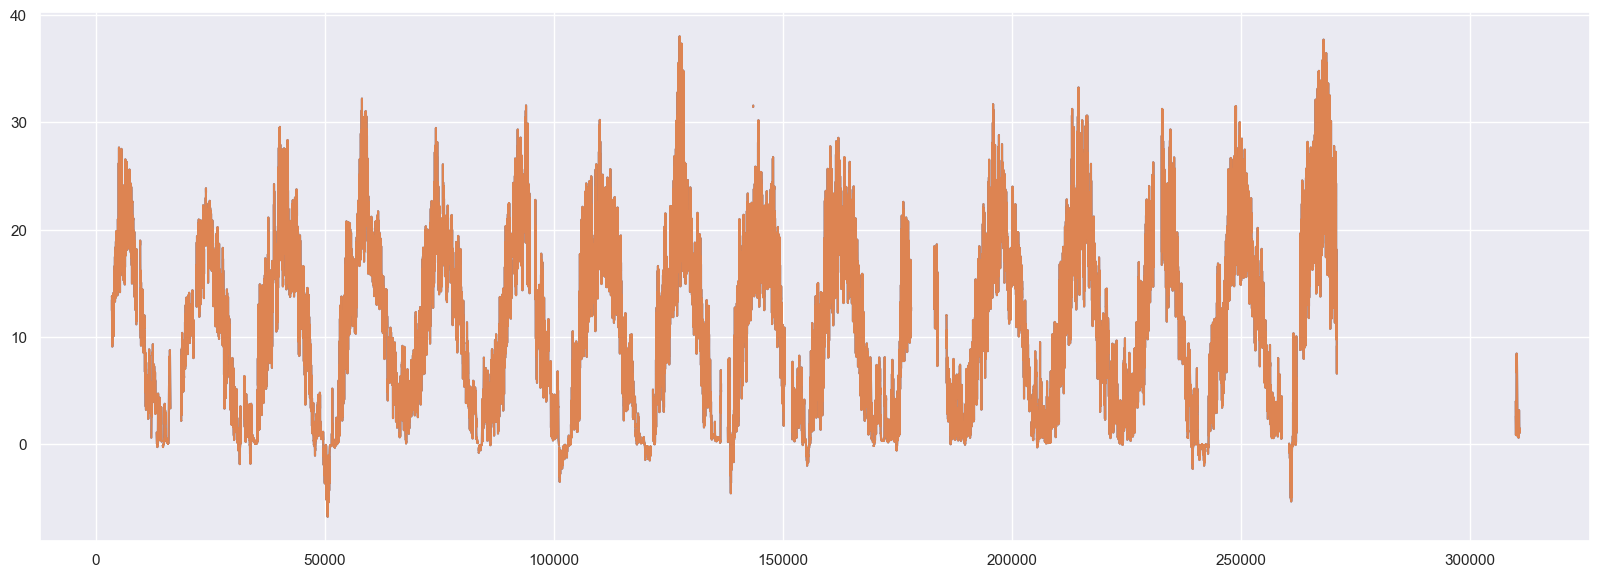

In [56]:
figure(figsize=(20, 7),dpi=100)
plt.plot(data1[data1["plotcode"] == "2A01M"]["soil_temp_05cm"].values)
plt.plot(data0)

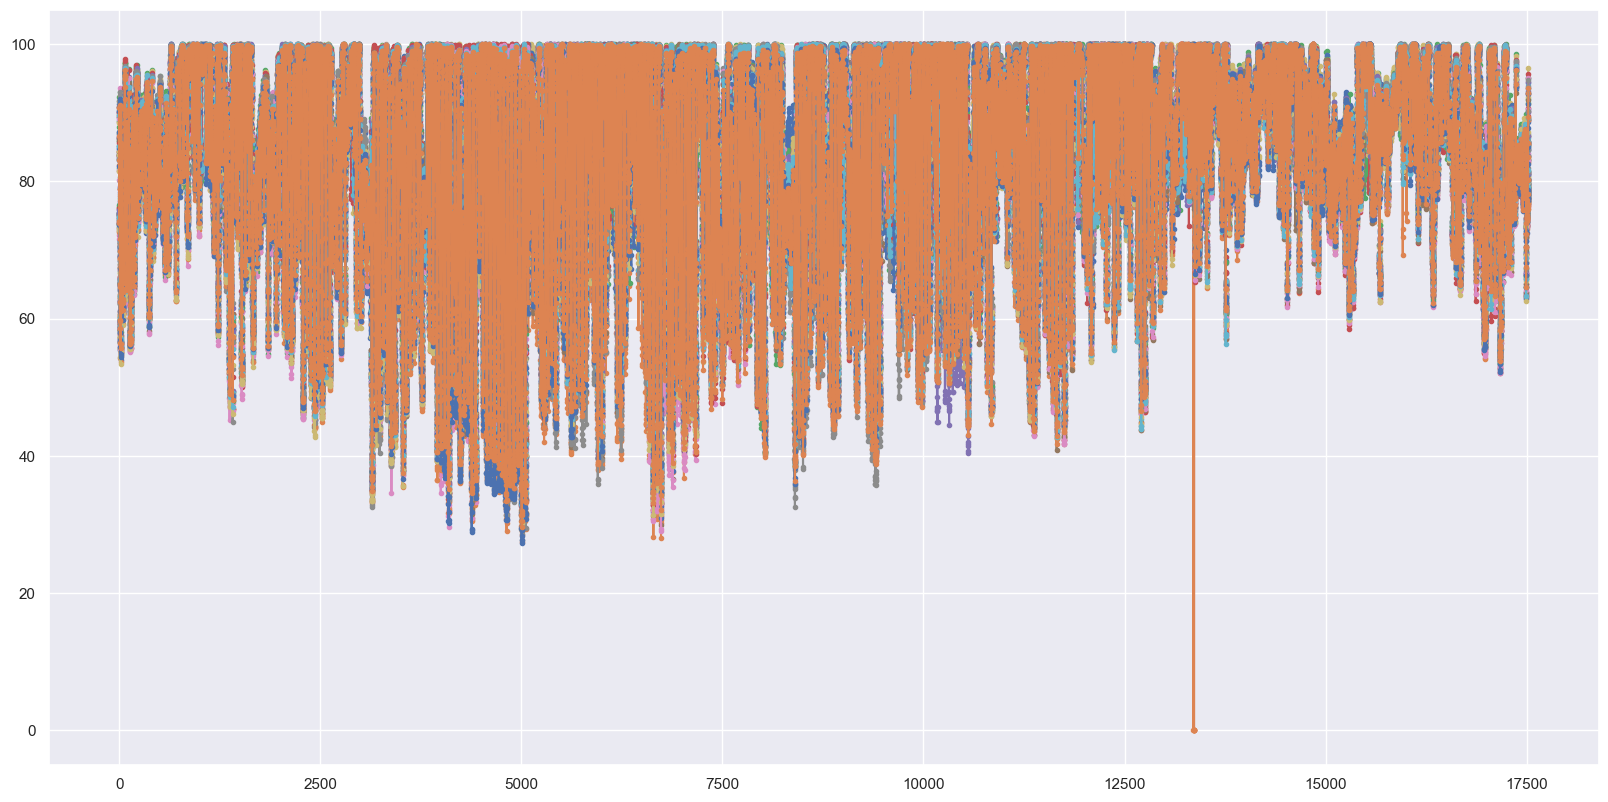

In [627]:
year=2007
var = data.columns[3:][4]
a = pd.Timestamp(str(year-1) + "-12-31 23:59")
b = pd.Timestamp(str(year+1) + "-01-01 00:00")
condition = (data["datetime"] > a) & (data["datetime"]< b)
selection= data[condition]
figure(figsize=(20, 10),dpi=100)
for plotcode in codes:
    x = list(range(0, len(selection[selection["plotcode"] == plotcode][var])))
    plt.plot(selection[selection["plotcode"] == plotcode][var].values, marker= ".")